In [1]:
import numpy as np
import pandas as pd


### 데이터 불러오기

In [2]:
df=pd.read_csv("C:/Users/user/Downloads/주제분석 1주차/data.csv")

In [3]:
df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700


## 데이터 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [8]:
#1216553 rows and 13 columns


In [5]:
df.isnull().sum()
#결측치 없음

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

## 불필요한 행 삭제
현재는 city 컬럼에 서울과 부산이 동시에 있습니다. 서울인 행만 남기세요.
파이썬의 데이터프레임은 일부 행을 삭제해도 인덱스가 수정되지 않습니다. reset_index를 이용해 인덱스를 재정렬하세요.

In [6]:
df=df[df['city']=='서울특별시']
df=df.reset_index(drop=True)

In [7]:
df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742280,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000
742281,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000
742282,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
742283,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500


## 변수 이름 바꾸기
transaction_real_price는 너무 깁니다.
이를 price로 바꿔줍시다

In [8]:
df.rename(columns = {"transaction_real_price": "price"}, inplace=True)


In [9]:
df.price

0          37500
1          20000
2          38500
3         118000
4         120000
           ...  
742280     53000
742281     53000
742282     56500
742283     55500
742284     63750
Name: price, Length: 742285, dtype: int64

## 1.5 불필요한 변수 삭제
transaction_id 변수는 인덱스이니 삭제합니다.
apartment_id 변수는 다른 변수와 겹치니 삭제합니다.
jibun 변수는 너무 지엽적이고, 유의미하지 않을 것으로 예상되니 삭제합니다.
city는 지금 서울 하나뿐이니 삭제합시다.
변수들을 삭제하고 데이터프레임의 차원을 재확인 해주세요.

In [10]:
df=df.drop(['transaction_id','apartment_id','jibun','city'],axis='columns')
df

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...
742280,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000
742281,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000
742282,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
742283,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500


## 1.6 연/월 뽑기
현재는 연도와 월이 동시에 기재되어 있습니다. 이를 분리해줍시다.
해당 컬럼을 삭제하지는 말고, 연도+월/연도/월 이렇게 총 세가지 컬럼이 남아 있으면 됩니다.
해당 컬럼의 이름은 transaction_year, transaction_month로 해주세요.

In [11]:
def find_year2(x):
    result=x//100
    return result
def find_month2(x):
    result=x%100
    return result

print(find_year2(200801))
print(find_month2(200801))

2008
1


In [12]:
200802%100

2

In [13]:
df['transaction_year']=df['transaction_year_month'].apply(lambda x: find_year2(x))
df['transaction_month']=df['transaction_year_month'].apply(lambda x: find_month2(x))
df

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1
...,...,...,...,...,...,...,...,...,...,...,...
742280,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11
742281,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11
742282,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11
742283,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11


## 1.7 필요 연도 뽑기
너무 오래전의 데이터는 현재의 가격에 유의미한 영향을 미치지 않을 것 같습니다.
더불어서 현재 데이터가 너무 많습니다. 조금이라도 줄이기 위해 연도를 제한합시다.
2012년도부터의 데이터만 사용하도록 뽑습니다. 이후 인덱스도 재정렬해줍시다.

In [14]:
df=df[df['transaction_year']>=2012]
df=df.reset_index(drop=True)
df

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11
513524,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11
513525,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11
513526,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11


# 2. 데이터 시각화

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 거래가격 분포 확인
첫번째 matplotlib/seaborn 시각화인만큼, 코드는 주어져 있습니다. 주석까지 달아둘게요. 조금 수정해볼까요?

거래가격 변수의 분포를 boxplot과 histogram을 이용해 확인합니다.
기본적인 플랏은 있는데, 각각 x축 이름을 'Price'로 추가하세요.
박스플랏 왼쪽의 혼자 있는 1이 거슬리니 지워보세요! 나중에 다시 와서 천천히 지워봐도 됩니다.
결과를 간단히 해석해주세요!

Text(0.5, 0, 'Price')

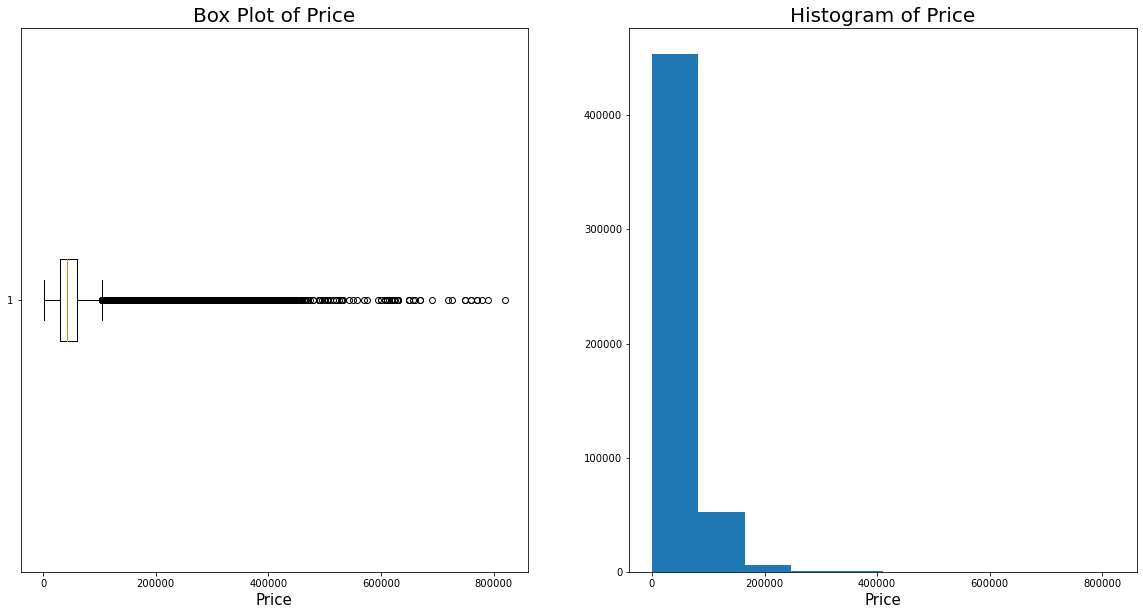

In [16]:
firstplot = plt.figure(figsize=(20,10)) # (20, 10)  사이즈의 firstplot이란 plot을 생성할거임
axes1 = firstplot.add_subplot(1, 2, 1) # 플랏을 분할할건데, 1행 2열로 분할할거고, 이건 그중 첫번째 플랏임
axes2 = firstplot.add_subplot(1, 2, 2) # 이건 그중에 두번째 플랏임

axes1.boxplot(data=df,x='price',vert=0) # 첫번째 플랏에는 boxplot을 그릴건데, 가로로 눕힐거임
axes1.set_title("Box Plot of Price",size=20) # 플랏 제목도 달고, 폰트 사이즈도 지정줄거임
axes1.set_xlabel('Price',size=15)
axes2.hist(data=df,x='price') # 두번째 플랏은 히스토그램 그릴거임
axes2.set_title("Histogram of Price",size=20)
axes2.set_xlabel('Price',size=15)


Text(0.5, 1.0, 'Histogram of Price')

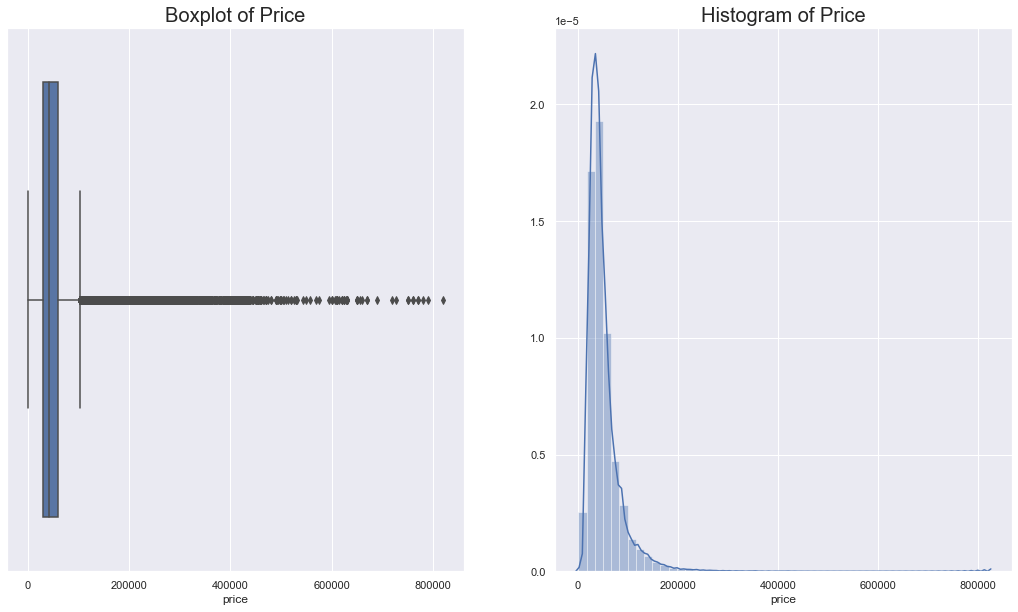

In [17]:
sns.set(font_scale = 1) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

sns.boxplot(data=df,x='price',ax=axs[0])
axs[0].set_title("Boxplot of Price",size=20)
sns.distplot(df['price'],ax=axs[1])

axs[1].set_title("Histogram of Price",size=20)

## 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인¶
왼쪽에는 거래연도별 거래 횟수의 분포를, 오른쪽에는 거래연도별 거래 가격의 분포를 그려주세요.
더불어서 제목, y축 label을 쓰세요.
플랏을 해석해주세요.

In [18]:
count=df.groupby(['transaction_year'],as_index=False)['price'].count()
count.rename(columns = {"price": "count"}, inplace=True)
count

,transaction_year,count
0,2012,40693
1,2013,67594
2,2014,84825
3,2015,119354
4,2016,109698
5,2017,91364


In [19]:
price=df.groupby(['transaction_year'],as_index=False)['price'].mean()
price

,transaction_year,price
0,2012,44415.902268
1,2013,44319.457718
2,2014,45848.998208
3,2015,47747.375873
4,2016,53693.710223
5,2017,61566.261558


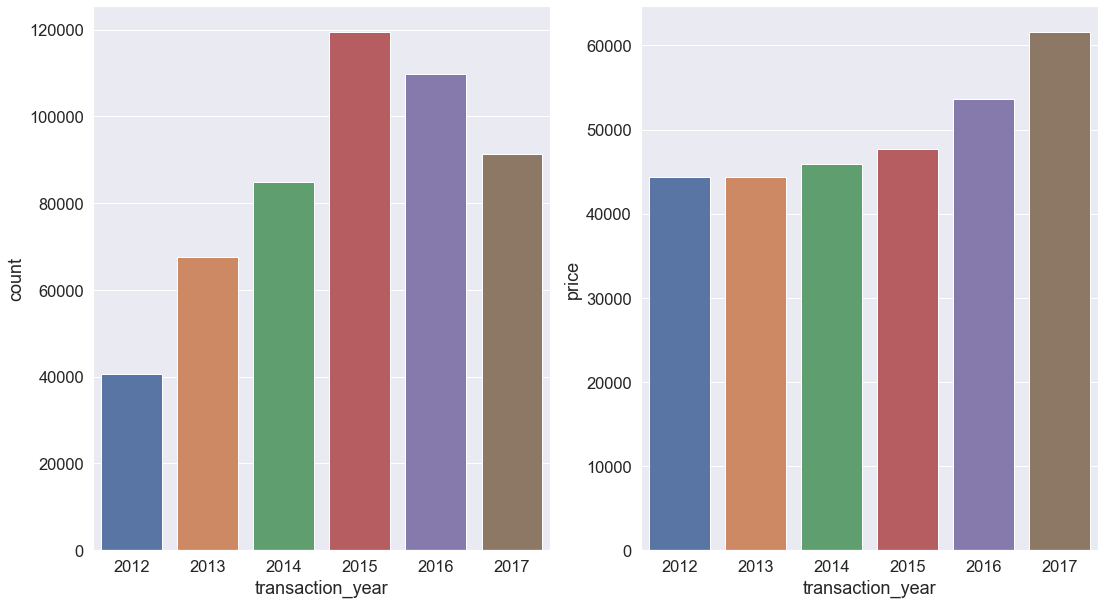

In [20]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

sns.barplot(data=count,x='transaction_year',y='count',ax=axs[0])

sns.barplot(data=price,x='transaction_year',y='price',ax=axs[1])


플롯 해석: 거래횟수는 2015년까지 상승하다가 2016년도부터는 하락세를 보인다.
연도별 평균 거래비용을 보았을 때, 점차 상승하는 모습을 보인다. 실거래가가 점차 올라가는 것처럼 보인다

## 2.3 층 분포 확인 / 층별 가격 분포 확인
왼쪽에는 층별 거래횟수의 분포를, 오른쪽에는 층별 평균거래가격의 분포를 그려주세요.
오른쪽 barplot의 error바는 없애서 표현해주세요
x축은 없애주세요
'고층일수록 비싸지 않을까?' 라는 가설을 확인하기 위함입니다.
결과를 해석해주세요

In [21]:
fl_count=df.groupby(['floor'],as_index=False)['price'].count()
fl_count.rename(columns = {"price": "count"}, inplace=True)
fl_count

,floor,count
0,-4,4
1,-3,6
2,-2,15
3,-1,62
4,1,31346
...,...,...
68,65,2
69,66,3
70,67,1
71,68,3


In [22]:
fl_price=df.groupby(['floor'],as_index=False)['price'].mean()
fl_price

,floor,price
0,-4,61454.250000
1,-3,59877.000000
2,-2,165809.066667
3,-1,68481.677419
4,1,46887.854495
...,...,...
68,65,128150.000000
69,66,246000.000000
70,67,105000.000000
71,68,184500.000000


In [23]:
fl_price.sort_values(by=['price'], axis=0,ascending=False)



,floor,price
63,60,330000.000000
59,56,247750.000000
69,66,246000.000000
64,61,237500.000000
51,48,236774.296296
...,...,...
7,4,48333.412256
9,6,48106.646636
18,15,47885.074160
5,2,47394.697395


[]

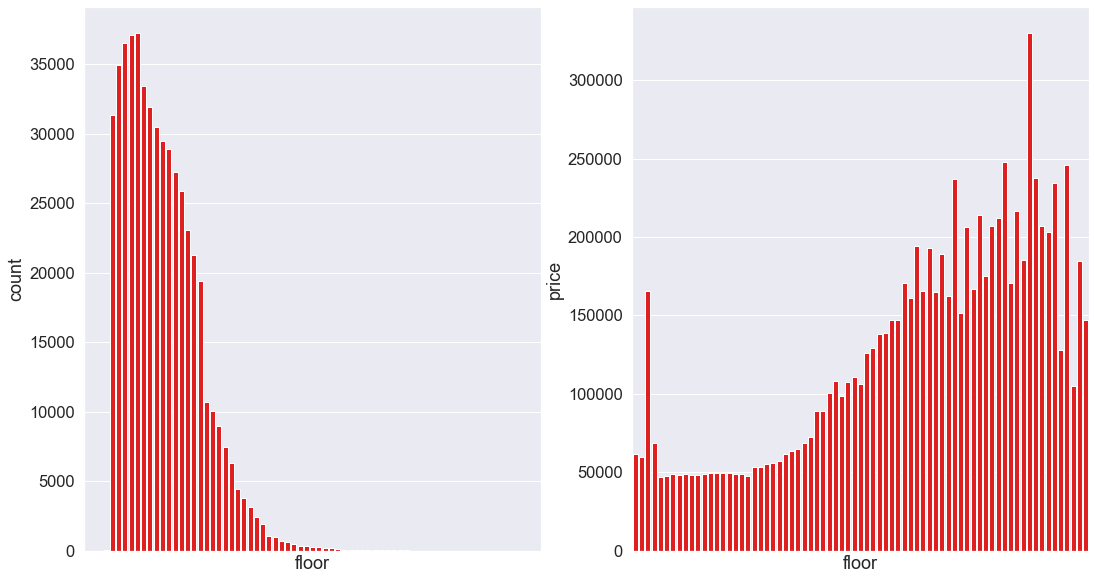

In [24]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

sns.barplot(data=fl_count,x='floor',y='count',ax=axs[0],color='red',)
axs[0].xaxis.set_ticks([])
sns.barplot(data=fl_price,x='floor',y='price',ax=axs[1],color='red')
axs[1].xaxis.set_ticks([])

층이 높아질 수록 거래횟수가 감소하고, 비용이 대체적으로 증가한다. 하지만 일정 층수를 넘어간 초고층에서는 오히려 가격이 감소한다
3층은 다른 저층에 비해 높은 가격대를 보인다.

## 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인
왼쪽에는 완공연도별 거래횟수의 분포를, 오른쪽에는 완공연도별 평균거래가격의 분포를 그려주세요.
x축은 없애주세요. 오른쪽일수록 최근입니다.
'최근의 아파트들이 더 비싸지 않을까?'라는 가설을 확인하고 싶습니다.
결과를 해석해주세요.

In [25]:
com_count=df.groupby(['year_of_completion'],as_index=False)['price'].count()
com_count.rename(columns = {"price": "count"}, inplace=True)
com_price=df.groupby(['year_of_completion'],as_index=False)['price'].mean()


[]

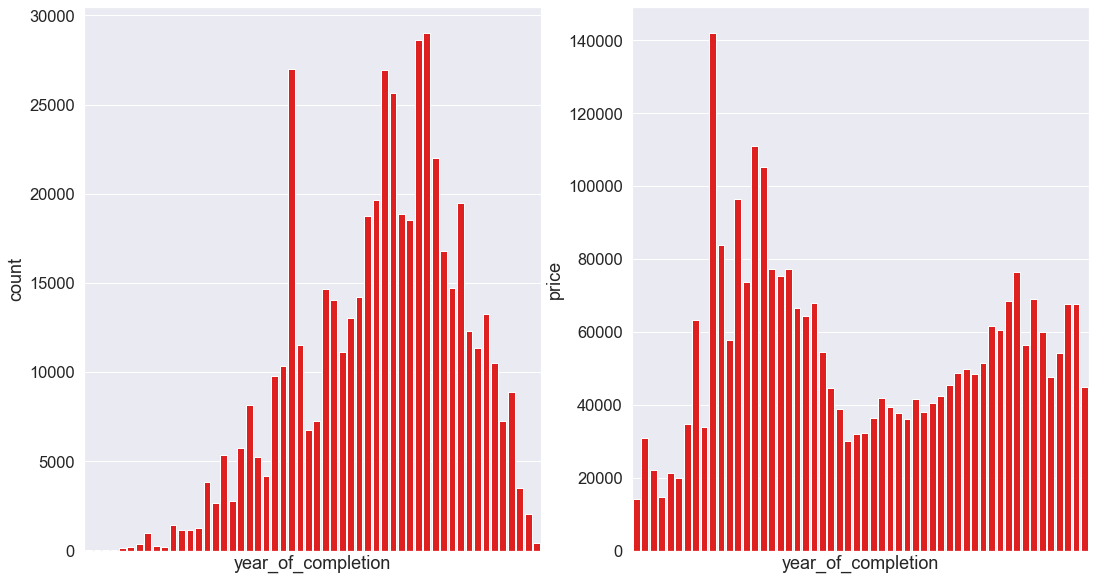

In [26]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

sns.barplot(data=com_count,x='year_of_completion',y='count',ax=axs[0],color='red',)
axs[0].xaxis.set_ticks([])
sns.barplot(data=com_price,x='year_of_completion',y='price',ax=axs[1],color='red')
axs[1].xaxis.set_ticks([])

In [27]:
com_count[com_count['count']==max(com_count['count'])]

,year_of_completion,count
40,2004,29019


대체적으로 완공년수가 최신일수록, 가격이 높고, 판매량이 많다. 하지만, 가격은 완공일수와는 그다지 상관없이 오래된 아파트가 높은 가격에 팔렸다. 이는 재개발을 염두에 두고 오래된 아파트가 가격이 비싼 영향을 받은 것 같다.

# 3. 파생변수 생성
## 3.1 아파트 연차 변수 생성
아파트 연차가 오래될수록 거래가격이 낮지 않을까?
이를 반영하기 위해 아파트 연차 변수 until_trans를 생성합시다.
그리고 이를 시각화해봅시다.
그리고 해석해주세요
단순히 아파트 연차를 넣는 것 이외에 어떤 방식으로 파생변수를 만들 수 있을까요?

In [28]:
df['utils_trans']=df['transaction_year']-df['year_of_completion']
df

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,utils_trans
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1,4
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1,4
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1,4
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1,7
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11,6
513524,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11,8
513525,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11,8
513526,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11,8


In [29]:
d_count=df.groupby(['utils_trans'],as_index=False)['price'].count()
d_count.rename(columns = {"price": "count"}, inplace=True)
d_price=df.groupby(['utils_trans'],as_index=False)['price'].mean()

[]

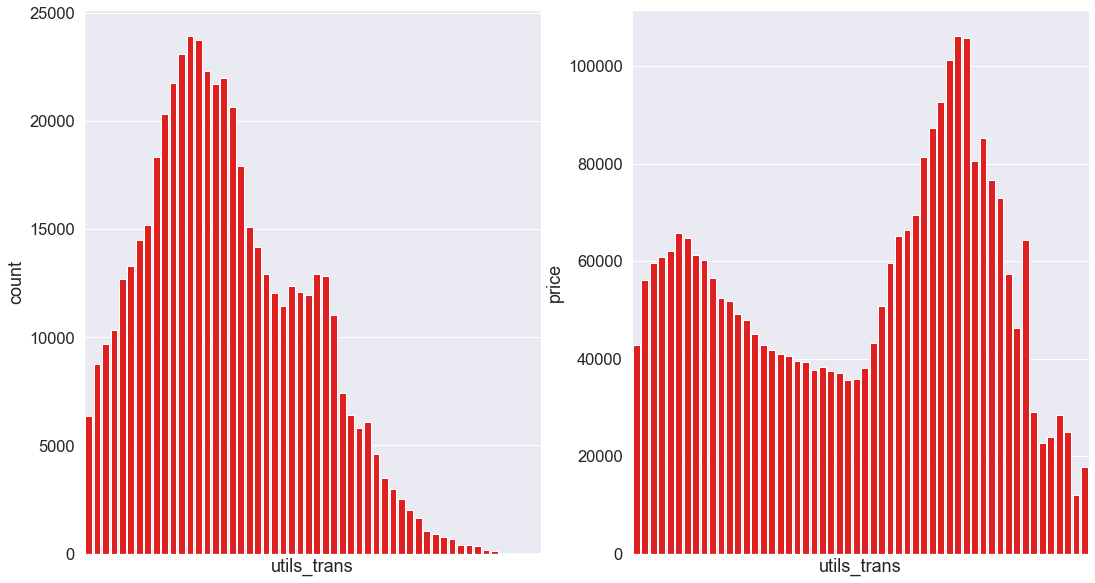

In [30]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

sns.barplot(data=d_count,x='utils_trans',y='count',ax=axs[0],color='red',)
axs[0].xaxis.set_ticks([])
sns.barplot(data=d_price,x='utils_trans',y='price',ax=axs[1],color='red')
axs[1].xaxis.set_ticks([])

??

## 3.2 거래 일 변수 변환
1,..,10은 0으로, 11,...,20은 1로, 21,..28/21,..29/21,..30/21,..31은 2로 변환하자.
np.where을 쓰면 편합니다. R의 ifelse라고 생각하면 됩니다.

In [31]:
def trans_date(x):
    if x=='1~10':
        return 0
    elif x=='11~20':
        return 1
    else:
        return 2
df['transaction_date']=df['transaction_date'].apply(lambda x: trans_date(x))

## 3.3 월 변수와 10일 단위 변수 통합
10일 단위로 월/일 변수를 통합하는 과정입니다.
월과 일을 한번에 다룰 수 있도록 파생변수를 만들어주세요
변수 이름은 transaction_month_date로 해주세요.
다음과 같은 결과가 나오면 됩니다.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dong                    513528 non-null  object 
 1   apt                     513528 non-null  object 
 2   addr_kr                 513528 non-null  object 
 3   exclusive_use_area      513528 non-null  float64
 4   year_of_completion      513528 non-null  int64  
 5   transaction_year_month  513528 non-null  int64  
 6   transaction_date        513528 non-null  int64  
 7   floor                   513528 non-null  int64  
 8   price                   513528 non-null  int64  
 9   transaction_year        513528 non-null  int64  
 10  transaction_month       513528 non-null  int64  
 11  utils_trans             513528 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 47.0+ MB


In [ ]:
3; 01 0 4;01 1 5;01 2 6; 02 0 7;02 1 8; 02 2

In [46]:
def get_md(x,y):
    if y==0:
        return 3*x
    elif y==1:
        return 3*x+1
    else:
        return 3*x+2


In [45]:
print(get_md(x,y))

5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dong                    513528 non-null  object 
 1   apt                     513528 non-null  object 
 2   addr_kr                 513528 non-null  object 
 3   exclusive_use_area      513528 non-null  float64
 4   year_of_completion      513528 non-null  int64  
 5   transaction_year_month  513528 non-null  int64  
 6   transaction_date        513528 non-null  int64  
 7   floor                   513528 non-null  int64  
 8   price                   513528 non-null  int64  
 9   transaction_year        513528 non-null  int64  
 10  transaction_month       513528 non-null  int64  
 11  utils_trans             513528 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 47.0+ MB


In [48]:
df['transaction_month_date']=''

In [49]:
df['transaction_month_date']=df.apply(lambda x: get_md(x.transaction_month, x.transaction_date), axis=1)

In [50]:
df[['transaction_month_date']]

,transaction_month_date
0,3
1,4
2,4
3,3
4,5
...,...
513523,34
513524,35
513525,35
513526,35


In [51]:
df[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


## 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
다음의 자료를 참고해서 3.3에서 생성한 변수에 대해 삼각변환을 시행해주세요!
변수명은 sin_date, cos_date로 지정해주세요.
year_of_completion, transaction_year_month, transaction_date, transaction_month, transaction_month_date 변수를 제거하세요

In [52]:
import math # 삼각변환 위한 패키지

In [53]:
x=df['transaction_month_date']

In [54]:
seconds_in_day = 24*60*60

df['sin_date'] = np.sin(2*np.pi*df.transaction_month_date/seconds_in_day)
df['cos_date'] = np.cos(2*np.pi*df.transaction_month_date/seconds_in_day)

df.drop(['year_of_completion', 'transaction_year_month', 'transaction_date', 'transaction_month', 'transaction_month_date'], 
        axis=1, inplace=True)

df.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,0.000218,1.0
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,0.000291,1.0
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,0.000291,1.0
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,0.000218,1.0
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,0.000364,1.0


## 3.5 삼각변환을 통한 장점
만약 이런식으로 처리하지 않고, 시기별로 dummy(one-hot)을 잡거나, label인코딩을 하면 어떻게 될까요?
이런식으로 삼각변환 했을 때의 장점을 말해주세요.
다음의 자료를 참고하세요. 직접적으로 관련되기도, 간접적으로 관련되기도 합니다.
https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
꼭 둘다 읽어주세요!
https://skyjwoo.tistory.com/entry/positional-encoding%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80
현재 자연어처리에 가장 많이 사용되는 트랜스포머 구조에서 positional encoding에 대한 설명입니다.

# 4. 텍스트 데이터 다루기
보통 이런 정형데이터 분석에서 텍스트 데이터가 끼면 난감합니다. 다만 이런 텍스트들에도 유의미한 정보들이 존재할겁니다.

우리는 보통 아파트 이름에 막 영어 들어가고 세련될수록 비쌀 것이라고 예측할 수 있습니다.
무궁화아파트보다는 힐스테이트, 롯데캐슬이 더 비쌀 것 같잖아요?
이런 정보를 담아낼 수 있도록 과정을 거쳐봅시다.
## 4.1 아파트 이름 한글부분만 뽑기
아파트의 이름만 가져와서, 한글만 남기세요.

데이터의 apt열을 가져와서 apt 변수명에 저장하세요.
특수문자/숫자를 모두 제거하세요.
앞에 광화문과 같은 지역명은 그냥 남기세요.
해당 결과를 head를 통해 보여주세요.

In [60]:
apt=df[['apt']]
apt2=df[['apt']]
apt2

,apt
0,광화문풍림스페이스본(9-0)
1,광화문풍림스페이스본(9-0)
2,광화문풍림스페이스본(9-0)
3,로얄팰리스스위트
4,로얄팰리스스위트
...,...
513523,고덕리엔파크2단지
513524,강일리버파크3단지
513525,강일리버파크3단지
513526,강일리버파크1단지


In [61]:
import re
def cleanText(readData):
 
    #텍스트에 포함되어 있는 특수 문자 제거
 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》0123456789]', '', readData)
 
    return text
 
apt['apt']=apt['apt'].apply(lambda x: cleanText(x))
apt2['apt']=apt2['apt'].apply(lambda x: cleanText(x))
apt.head()

C:\Users\user\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,apt
0,광화문풍림스페이스본
1,광화문풍림스페이스본
2,광화문풍림스페이스본
3,로얄팰리스스위트
4,로얄팰리스스위트


## 4.2 아파트 이름 DTM
아파트 이름에 대한 문서단어행렬을 만드세요.

사이킷런의 CountVectorizer를 이용하세요. 이때 min_df = 5로 지정해주세요.


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
apt=apt['apt']
vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(apt)
apt = vectorizer.transform(apt)


In [63]:
print(vectorizer.vocabulary_)

{'광화문풍림스페이스본': 365, '로얄팰리스스위트': 1135, '현대뜨레비앙': 3908, '운현신화타워': 2839, '창신쌍용': 3294, '동대문': 865, '두산': 988, '종로청계힐스테이트': 3176, '동일상가': 958, '렉스팰리스': 1120, '삼성': 1726, '대아파크빌': 721, '세종로대우': 2136, '파크팰리스': 3574, '킹스매너': 3472, '경희궁의아침단지': 272, '동성아파트동': 904, '아남': 2470, '동아': 915, '롯데캐슬': 1153, '로잔': 1138, '크래스빌': 3463, '롯데낙천대': 1149, '인왕산아이파크': 3021, '현대': 3891, '미도파': 1386, '효성쥬얼리시티': 4062, '종로센트레빌': 3172, '대성맨션': 708, '청운현대': 3397, 'cs타워': 11, '렉스빌': 1119, '창신이수': 3295, '브라운스톤창신': 1651, '벽산블루밍평창힐스': 1559, '갑을': 117, 'mid그린동': 52, '르트랑시망': 1186, '무악다온채': 1351, '세종': 2133, '대성스카이렉스': 709, '하림빌라트': 3673, '도시그린빌라트': 831, '신동아블루아광화문의': 2299, '리치캐슬아파트': 1219, '롯데캐슬천지인': 1169, '그린': 410, '부암스카이뷰': 1608, '동대문맨션': 866, '건양하늘터': 228, '일성빌라트': 3036, '아마레스': 2477, '숭인동': 2216, '낙원': 509, '노블레스빌': 546, '대보': 701, '종로유케이': 3174, '삼전솔하임차': 1812, '두레엘리시안': 984, '주건축물제동': 3182, '종로동광모닝스카이': 3171, '신문로맨션': 2319, '이화에수풀': 3014, '숭인상가': 2217, '종로중흥s클래스': 3175, '동문': 877, '숭인한양leeps': 2218, '탑스빌': 3482, '종

## 4.3 아파트 이름 tf-idf
아파트 이름에 대한 문서단어행렬을 만드세요.

사이킷런의 TfidfVectorizer를 이용하세요. 이때 min_df = 5로 지정해주세요.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
apt2=apt2['apt']
tfidf_vectorizer = TfidfVectorizer(min_df=5)
tfidf_vectorizer.fit(apt2)
print(tfidf_vectorizer.vocabulary_)


{'광화문풍림스페이스본': 365, '로얄팰리스스위트': 1135, '현대뜨레비앙': 3908, '운현신화타워': 2839, '창신쌍용': 3294, '동대문': 865, '두산': 988, '종로청계힐스테이트': 3176, '동일상가': 958, '렉스팰리스': 1120, '삼성': 1726, '대아파크빌': 721, '세종로대우': 2136, '파크팰리스': 3574, '킹스매너': 3472, '경희궁의아침단지': 272, '동성아파트동': 904, '아남': 2470, '동아': 915, '롯데캐슬': 1153, '로잔': 1138, '크래스빌': 3463, '롯데낙천대': 1149, '인왕산아이파크': 3021, '현대': 3891, '미도파': 1386, '효성쥬얼리시티': 4062, '종로센트레빌': 3172, '대성맨션': 708, '청운현대': 3397, 'cs타워': 11, '렉스빌': 1119, '창신이수': 3295, '브라운스톤창신': 1651, '벽산블루밍평창힐스': 1559, '갑을': 117, 'mid그린동': 52, '르트랑시망': 1186, '무악다온채': 1351, '세종': 2133, '대성스카이렉스': 709, '하림빌라트': 3673, '도시그린빌라트': 831, '신동아블루아광화문의': 2299, '리치캐슬아파트': 1219, '롯데캐슬천지인': 1169, '그린': 410, '부암스카이뷰': 1608, '동대문맨션': 866, '건양하늘터': 228, '일성빌라트': 3036, '아마레스': 2477, '숭인동': 2216, '낙원': 509, '노블레스빌': 546, '대보': 701, '종로유케이': 3174, '삼전솔하임차': 1812, '두레엘리시안': 984, '주건축물제동': 3182, '종로동광모닝스카이': 3171, '신문로맨션': 2319, '이화에수풀': 3014, '숭인상가': 2217, '종로중흥s클래스': 3175, '동문': 877, '숭인한양leeps': 2218, '탑스빌': 3482, '종

## 4.4 질문
해당 방식으로 만든 행렬을 원래 데이터프레임에 붙여서 분석/모델링을 진행한다고 생각해봅시다.

어떤 문제점이 발생할 수 있을까요?
해당 어떤 방식으로 개선할 수 있을까요?

### 문서단서행렬의 문제점
문서가 여러개 있을 때 단순히 단어 빈도(Term Frequency)를 적용해서 문서-단어 행렬을 나타내면 문제가 있을 수도 있다.어떤 단어가 하나의 문서에서도 많이 사용되었다고 하더라도, 다른 모든 문서에서 널리 쓰이는 흔해 빠진 단어라면 이 단어는 특정성(specificity)이 떨어지는 것이다.
--> tf-idf 사용

### tf-idf의 문제점


## 4.5 질문
신입기수분들은 4.5번에 반드시 답변하지 않아도 괜찮습니다.

만약 해당 아파트 이름을 word2vec으로 임베딩해, 임베딩된 행렬을 원래 데이터프레임에 붙여서 문석 모델링을 진행한다고 합시다.

이때 word2vec은 100차원에 임베딩 됩니다. (size=100)
word2vec은 잘 작동할 수 있을까요?
만약에 잘 작동할/작동하지 않을 것 같다면 그 이유를 설명해주세요.
2021-01/2020-02 딥러닝 팀 3주차 교안을 참고하는 것도 좋습니다.

# 5. 인코딩
현실적인 이유로 정형데이터 모델링에서는 텍스트를 자연어처리에서의 접근으로 임베딩하는 것보단, 인코딩하는 것이 일반적입니다. 다만 동일하게 원핫으로 하게되면 범주가 많은 경우 힘들 수 있겠죠? 어려움을 직접 마주하고 해결해봅시다.

## 5.1 원핫 인코딩
dong과 apt 변수에 대해 원핫 인코딩을 시행하고, 원래변수명_onehot로 저장해주세요.
조금 오래 걸릴 수 있습니다.
만들어진 데이터프레임의 차원을 확인하고, 원핫 인코딩이 이 상황에 적절할지 말해주세요.

In [71]:
dong=df['dong']
apt=df[['apt']]

In [72]:
apt['apt']=apt['apt'].apply(lambda x: cleanText(x))
apt=apt['apt']

C:\Users\user\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
apt_onehot=pd.get_dummies(df,columns = ['apt'])
apt_onehot

,dong,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date,apt_(1-10),...,apt_힐탑,apt_힐탑아파트3차(894-3),apt_힐탑아파트4차(894-5),apt_힐탑이루미,apt_힐탑트레져1동,apt_힐튼,apt_힐튼빌리지1차,apt_힐튼빌리지2차,apt_힐하우스,apt_힐하우스(802-3)
0,사직동,사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,0.000218,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,사직동,사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,0.000291,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,사직동,사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,0.000291,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,수송동,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,0.000218,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,수송동,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,0.000364,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,강일동 717 고덕리엔파크2단지,59.72,9,53000,2017,6,0.002473,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513524,강일동,강일동 674 강일리버파크3단지,59.87,12,53000,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513525,강일동,강일동 674 강일리버파크3단지,84.74,3,56500,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513526,강일동,강일동 665 강일리버파크1단지,84.74,9,55500,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
apt_onehot.shape
#너무 큰 차원

(513528, 6774)

In [74]:
dong_onehot=pd.get_dummies(df,columns = ['dong'])
dong_onehot

,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date,dong_가락동,...,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효제동,dong_효창동,dong_후암동,dong_휘경동,dong_흑석동,dong_흥인동
0,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,0.000218,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,0.000291,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,0.000291,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,0.000218,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,0.000364,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,9,53000,2017,6,0.002473,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513524,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,12,53000,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513525,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,3,56500,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0
513526,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,9,55500,2017,8,0.002545,0.999997,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dong_onehot.shape
#너무 큰 차원
#원핫인코딩은 적절치 않다.

(513528, 338)

## 5.2 레이블(label) 인코딩 - transaction_year
원래 데이터에서 transaction_year에 대해 label 인코딩을 시행하세요. 그리고 head()로 결과를 보여주세요.
연도 자체는 하나의 범주로 인식할 수 있으니 인코딩을 시행해줍니다.
이런 인코딩이 적절할지 2.2의 시각화를 보고 답변해주세요.

In [77]:
data=df
data.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,0.000218,1.0
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,0.000291,1.0
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,0.000291,1.0
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,0.000218,1.0
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,0.000364,1.0


In [79]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le = le.fit(data['transaction_year'])   #train['col']을 fit
data['transaction_year'] = le.transform(data['transaction_year'])   #train['col']에 따라 encoding
data.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,0,4,0.000218,1.0
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,0,4,0.000291,1.0
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,0,4,0.000291,1.0
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,0,7,0.000218,1.0
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,0,7,0.000364,1.0


In [ ]:
#정렬된 순서대로 인코딩을 하니까 괜찮은 것 같다

## 5.3 레이블(label) 인코딩
dong과 apt 변수에 대해 레이블 인코딩을 시행하고, 원래변수명_label로 저장해주세요.
그리고 head()로 결과를 보여주세요.
이런 방식의 인코딩이 적절한지 답변해주세요.

In [80]:
le = LabelEncoder()
le = le.fit(data['dong'])  
data['dong_label'] = le.transform(data['dong'])  
le2 = LabelEncoder()
le2 = le2.fit(data['apt'])  
data['dong_apt'] = le2.transform(data['apt'])  
data.head()

#동이나 아파트 이름 사이에 대소가 없는데, 라벨이 다르게 책정되어 있어 잘못 가중치를 줄 것 같다

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date,dong_label,dong_apt
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,0,4,0.000218,1.0,130,805
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,0,4,0.000291,1.0,130,805
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,0,4,0.000291,1.0,130,805
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,0,7,0.000218,1.0,164,2042
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,0,7,0.000364,1.0,164,2042


In [83]:
data_label=data
data_label.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,utils_trans,sin_date,cos_date,dong_label,dong_apt
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,0,4,0.000218,1.0,130,805
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,0,4,0.000291,1.0,130,805
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,0,4,0.000291,1.0,130,805
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,0,7,0.000218,1.0,164,2042
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,0,7,0.000364,1.0,164,2042


## 5.3 mean encoding
원래변수명_mean을 만드세요.
해당 데이터에 대해 apt변수에 대해 mean encoding을 시행하세요. head()를 통해 확인하세요.
이런 인코딩이 적절할지, 장/단점에 대해 말해주세요.

In [84]:
# target 에 대한 sex 내 각 변수의 mean 을 구함.
apt_mean = data.groupby('apt')['price'].mean()
apt_mean

apt
(1-10)          15000.000000
(1-102)         18000.000000
(1-35)          84250.000000
(1101-1)        11599.107143
(115-4)         27585.714286
                   ...      
힐튼              20480.000000
힐튼빌리지1차         53416.666667
힐튼빌리지2차         72900.000000
힐하우스           124666.666667
힐하우스(802-3)     80000.000000
Name: price, Length: 6765, dtype: float64

In [86]:
data['apt_mean'] = data['apt'].map(apt_mean)
data[['apt', 'apt_mean']].head()

,apt,apt_mean
0,광화문풍림스페이스본(9-0),91174.766355
1,광화문풍림스페이스본(9-0),91174.766355
2,광화문풍림스페이스본(9-0),91174.766355
3,로얄팰리스스위트,36609.649123
4,로얄팰리스스위트,36609.649123
